# AI Lab-6
## Regression, feature selection and PCA
### Author : Abdul Basit

### Lab Practice

In [2]:
# importing all necessary libraries
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn as sk

In [3]:
boston = datasets.load_boston()

In [3]:
a = boston.keys()
a

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
for i in a:
    print (boston[i])
    print('\n')

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 1

In [6]:
boston.data.shape

(506, 13)

Separating the features and labels

In [7]:
b_data = boston.data
b_target = boston.target
b_data.shape, b_target.shape

((506, 13), (506,))

Converting data from arrays to give it a better look:


In [8]:
df_boston = pd.DataFrame(b_data, columns = boston.feature_names)
df_boston['Price'] = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [10]:
A = df_boston.loc[:,df_boston.columns!='Price']
B = df_boston.Price
A.shape, B.shape

((506, 13), (506,))

In [11]:
from sklearn.model_selection import train_test_split
Atrain, Atest, Btrain, Btest = train_test_split(A,B,test_size = 0.25 , shuffle = True)
Atrain.shape, Btest.shape, Atest.shape, Btest.shape

((379, 13), (127,), (127, 13), (127,))

# Linear Regression:

In [12]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [13]:
LinReg.fit(Atrain,Btrain)

LinearRegression()

In [14]:
Acc = LinReg.score(Atest,Btest)
Acc

0.6973814511373808

# Selecting a feature from the dataset:

In [15]:
dAtest = pd.DataFrame(Atest,columns = boston.feature_names)
dAtrain = pd.DataFrame(Atrain, columns = boston.feature_names)
dAtest = dAtest[['LSTAT']]
dAtrain = dAtrain[['LSTAT']]

Plotting the selected feature value distribution along with price of the house and model line:

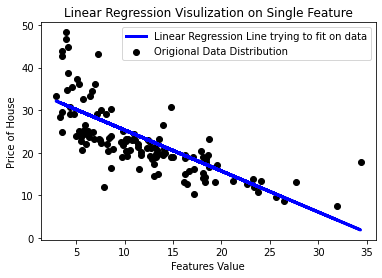

In [16]:
LinReg.fit(dAtrain,Btrain)

plt.xlabel('Features Value')
plt.ylabel('Price of House')
plt.title('Linear Regression Visulization on Single Feature')
plt.scatter(dAtest, Btest, color = 'black', label = 'Origional Data Distribution')
plt.plot(dAtest, LinReg.predict(dAtest),color= 'blue',linewidth = 3, label = 'Linear Regression Line trying to fit on data')
plt.legend(loc = 'upper right')

In [17]:
s1Atr = Atrain[['CRIM','ZN','INDUS']]
s2Atr = Atrain[['CHAS','NOX','RM']]
s3Atr = Atrain[['AGE','DIS','RAD']]
s4Atr = Atrain[['TAX','PTRATIO','B','LSTAT']]

s1Ats = Atest[['CRIM','ZN','INDUS']]
s2Ats = Atest[['CHAS','NOX','RM']]
s3Ats = Atest[['AGE','DIS','RAD']]
s4Ats = Atest[['TAX','PTRATIO','B','LSTAT']]


# Fitting and evaluating on all slot:


In [18]:
LinReg.fit(s1Atr,Btrain)
LinReg.score(s1Ats,Btest)

0.27037529630740575

In [19]:
LinReg.fit(s2Atr,Btrain)
LinReg.score(s2Ats,Btest)

0.6439854997453323

In [20]:
LinReg.fit(s3Atr,Btrain)
LinReg.score(s3Ats,Btest)

0.2880822394503696

In [21]:
LinReg.fit(s4Atr,Btrain)
LinReg.score(s4Ats,Btest)

0.5294933075507673

# Calculating all metrics for all slots using linear regression

In [22]:
from sklearn.metrics import mean_absolute_error, explained_variance_score, mean_squared_error
LinReg.fit(s1Atr, Btrain)
print('Mean Absolute Error of slot 1:',mean_absolute_error(Btest,LinReg.predict(s1Ats)))
print('Mean Squared Error of slot 1:',mean_squared_error(Btest,LinReg.predict(s1Ats)))
print('Explained Variance Score of slot 1:',explained_variance_score(Btest,LinReg.predict(s1Ats)))


Mean Absolute Error of slot 1: 5.059122369908263
Mean Squared Error of slot 1: 46.55038541965242
Explained Variance Score of slot 1: 0.2734324995481613


In [23]:
LinReg.fit(s2Atr, Btrain)
print('Mean Absolute Error of slot 2:',mean_absolute_error(Btest,LinReg.predict(s2Ats)))
print('Mean Squared Error of slot 2:',mean_squared_error(Btest,LinReg.predict(s2Ats)))
print('Explained Variance Score of slot 2:',explained_variance_score(Btest,LinReg.predict(s2Ats)))


Mean Absolute Error of slot 2: 3.5615828528594813
Mean Squared Error of slot 2: 22.713885807274018
Explained Variance Score of slot 2: 0.6449648454751084


In [24]:
LinReg.fit(s3Atr, Btrain)
print('Mean Absolute Error of slot 3:',mean_absolute_error(Btest,LinReg.predict(s3Ats)))
print('Mean Squared Error of slot 3:',mean_squared_error(Btest,LinReg.predict(s3Ats)))
print('Explained Variance Score of slot 3:',explained_variance_score(Btest,LinReg.predict(s3Ats)))


Mean Absolute Error of slot 3: 5.06620075763394
Mean Squared Error of slot 3: 45.42067445490949
Explained Variance Score of slot 3: 0.28956391098447776


In [25]:
LinReg.fit(s4Atr, Btrain)
print('Mean Absolute Error of slot 4:',mean_absolute_error(Btest,LinReg.predict(s4Ats)))
print('Mean Squared Error of slot 4:',mean_squared_error(Btest,LinReg.predict(s4Ats)))
print('Explained Variance Score of slot 4:',explained_variance_score(Btest,LinReg.predict(s4Ats)))


Mean Absolute Error of slot 4: 4.124363663029604
Mean Squared Error of slot 4: 30.018539346586486
Explained Variance Score of slot 4: 0.539583954921667


Calculating all metrics for test dataset containing all features

In [26]:
LinReg.fit(Atrain, Btrain)
print('Mean Absolute Error:',mean_absolute_error(Btest,LinReg.predict(Atest)))
print('Mean Squared Error:',mean_squared_error(Btest,LinReg.predict(Atest)))
print('Explained Variance Score:',explained_variance_score(Btest,LinReg.predict(Atest)))


Mean Absolute Error: 3.211121306823105
Mean Squared Error: 19.307200007616494
Explained Variance Score: 0.6980780261748983


# Principal Components Analysis (PCA)

In [27]:
# Model Accuracy is 
Acc

0.6973814511373808

In [28]:
pca = PCA(n_components = 6)
pca.fit(b_data)
pca.explained_variance_ratio_

array([8.05823175e-01, 1.63051968e-01, 2.13486092e-02, 6.95699061e-03,
       1.29995193e-03, 7.27220158e-04])

In [29]:
pca = PCA(n_components = 9)
trA = pca.fit_transform(Atrain)
tsA = pca.transform(Atest)
trA

array([[  10.84929466,  -46.2202934 ,  -29.08434888, ...,    5.6262992 ,
          -1.09847486,    2.86817481],
       [-126.78945556,    3.24921573,    9.49018071, ...,   -1.14642997,
          -1.49519483,   -2.35908745],
       [ -93.02965333,   -1.07342878,   73.15005075, ...,   -1.53062014,
          -0.9694845 ,    6.27542951],
       ...,
       [ -31.02861692,  -22.94627273,   51.41622267, ...,    0.37799164,
          -4.43866841,   -2.31888068],
       [-123.50981799,    2.28215137,  -21.53308796, ...,   -3.06256327,
          -2.56885915,   -1.53555416],
       [-112.34124297,   -4.61212888,  -36.55407371, ...,   -3.63133166,
          -2.18319542,    3.16958238]])

In [30]:
#printing shape of the transformed data
trA.shape, tsA.shape

((379, 9), (127, 9))

In [31]:
LinReg.fit(A,B)
A.shape,B.shape

((506, 13), (506,))

Inspecting the feature importance using sklearn


In [32]:
from sklearn.inspection import permutation_importance
results = permutation_importance(LinReg,A,B,n_repeats = 10, random_state = 0)
for i in results.importances_mean.argsort():
    print('Features', A.columns[i], ' : " " has importance ', results.importances_mean[i])

Features AGE  : " " has importance  -5.548910744701541e-06
Features INDUS  : " " has importance  0.0002559542108843571
Features CHAS  : " " has importance  0.010819055164420988
Features B  : " " has importance  0.017641218683173355
Features CRIM  : " " has importance  0.020363719604837405
Features ZN  : " " has importance  0.028654099993403626
Features PTRATIO  : " " has importance  0.10172010312591148
Features TAX  : " " has importance  0.10429871447215393
Features NOX  : " " has importance  0.10516179633614428
Features RM  : " " has importance  0.16387631097184885
Features RAD  : " " has importance  0.17194503867037783
Features DIS  : " " has importance  0.23157574498764663
Features LSTAT  : " " has importance  0.3358087838164636
